In [132]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time
# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('max_colwidth',200)
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

In [133]:
xls_file = pd.ExcelFile('去掉小于100订单商户根据订单总数排序.xlsx')
xls_file_category = pd.ExcelFile('分类商品数量处理后.xlsx')
xls_file_rank = pd.ExcelFile('各店各商品排行处理后.xlsx')

In [134]:
df = pd.io.excel.ExcelFile.parse(xls_file)
dfc = pd.io.excel.ExcelFile.parse(xls_file_category)
dfr = pd.io.excel.ExcelFile.parse(xls_file_rank)

In [135]:
df

,商户id,行业,简称,全称,省,市,区,地址,电话,集团id,集团全称,联系方式,订单总数,订单总额,外卖订单量,外卖订单销售额,扫码点单销售数量,扫码点单销售额,微店铺销售数量,微店铺销售额,微外卖销售额,微外卖销售数量,商品数量,套餐数量,套餐销售数量,有规格商品数量,有规格商品销售数量,无规格商品数量,无规格商品销售数量,计件商品数量,计重商品数量,现金支付,支付宝,微信,翼支付,轻盈支付,银行卡,预付卡,充值卡,退款,分类数量（非空）,子分类数量（非空）,付款后消费无座,先付款有座,先消费有座
18674,943363,美食小吃快餐,宇佳川味小厨,韩思远142602199408220015,山西省,晋城市,阳城县,山西省晋城市阳城县金阳街宇佳美食广场,13835633628,2289,阳城县宇佳美食广场,13835633628,101,2289.71,0,0.0,0,0.0,0,0.0,0,0.00,50,0,0,0,0,71,126.000,50,0,1,0,0,0,0,0,12,13,0,0,0,1,0,0
7684,916256,美食小吃快餐,贡贡米线（福雷德店）,杭州经济技术开发区桌东饺子馆,浙江省,杭州市,江干区,浙江省杭州市江干区福雷德广场2幢商铺4-1号,18258824555,0,0,18258824555,101,2061.50,0,0.0,0,0.0,0,0.0,0,0.00,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19119,944223,美食面包甜点,聪少甜品南宋序集店,杭州市上城区恺美芮甜品店,浙江省,杭州市,上城区,中山中路59号,13326143133,0,0,13326143133,102,5905.00,0,0.0,0,0.0,0,0.0,0,0.00,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17047,940072,美食小吃快餐,永和豆浆,刘曙光130130197002100617,山西省,晋城市,城区,山西省晋城市阳城县步行街001号（红星金港美食城）,13935682979,2165,阳城县红星金港美食城,13935682979,102,1644.30,0,0.0,0,0.0,0,0.0,0,0.00,64,0,0,0,0,64,233.000,64,0,3,0,0,0,0,0,14,82,0,0,0,1,0,0
13243,931381,美食其他,下雪的村庄湖南店,娄底市娄星区下雪的村庄小吃娄底店,湖南省,娄底市,娄星区,湖南省娄底市娄星区五江碧桂园17-18栋三层338-354号,18673861012,0,0,18673861012,102,6426.00,0,0.0,0,0.0,0,0.0,0,0.00,104,0,0,0,100,109,52.000,104,0,22,0,0,0,0,0,39,0,6,9,0,1,0,0
18354,942732,美食小吃快餐,鱼你在一起四季广场店,杭州经济技术开发区杨红红餐饮店,浙江省,杭州市,江干区,四季广场1幢104号,15990029976,0,0,15990029976,102,2774.90,0,0.0,0,0.0,0,0.0,0,0.00,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17079,940123,美食小吃快餐,安徽传统牛肉汤,上海市奉贤区焦铺餐饮店,上海市,上海市,奉贤区,环城东路465弄3号,13122303308,0,0,13122303308,102,2113.00,0,0.0,0,0.0,0,0.0,0,0.00,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18692,943389,美食小吃快餐,宇佳重庆烤鱼,张程波140522198706070012,山西省,晋城市,阳城县,山西省晋城市阳城县金阳街宇佳美食广场,13835633628,2289,阳城县宇佳美食广场,13835633628,103,6829.85,0,0.0,0,0.0,0,0.0,0,0.00,61,0,0,0,0,61,215.000,61,0,0,0,0,0,0,0,12,15,2,0,0,1,0,0
14233,934052,美食小吃快餐,越风面馆,台州经济开发区越风面馆,浙江省,台州市,椒江区,浙江省台州市君悦大厦内铺018号,13566890253,0,0,13566890253,103,1702.00,0,0.0,0,0.0,0,0.0,0,0.00,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17306,940508,美食小吃快餐,天天烧烤,上海秉婷餐饮管理有限公司,上海市,上海市,金山区,上海市金山工业区亭卫公路6558号5幢2471室,15618088807,0,0,15618088807,103,10370.60,0,0.0,0,0.0,0,0.0,0,0.00,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [136]:
la = list(df.columns.values)
print(la)

['商户id', '行业', '简称', '全称', '省', '市', '区', '地址', '电话', '集团id', '集团全称', '联系方式', '订单总数', '订单总额', '外卖订单量', '外卖订单销售额', '扫码点单销售数量', '扫码点单销售额', '微店铺销售数量', '微店铺销售额', '微外卖销售额', '微外卖销售数量', '商品数量', '套餐数量', '套餐销售数量', '有规格商品数量', '有规格商品销售数量', '无规格商品数量', '无规格商品销售数量', '计件商品数量', '计重商品数量', '现金支付', '支付宝', '微信', '翼支付', '轻盈支付', '银行卡', '预付卡', '充值卡', '退款', '分类数量（非空）', '子分类数量（非空）', '付款后消费无座', '先付款有座', '先消费有座']


In [137]:
#过滤
data = df[df['订单总数']>100]  
#预付卡
yufuka = len(data['预付卡'][data['预付卡']>0])

In [138]:
#写入文件
'''writer = pd.ExcelWriter('去掉小于100订单商户根据订单总数排序.xlsx')
dffiter.to_excel(writer,'a')
writer.save()
'''

"writer = pd.ExcelWriter('去掉小于100订单商户根据订单总数排序.xlsx')\ndffiter.to_excel(writer,'a')\nwriter.save()\n"

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


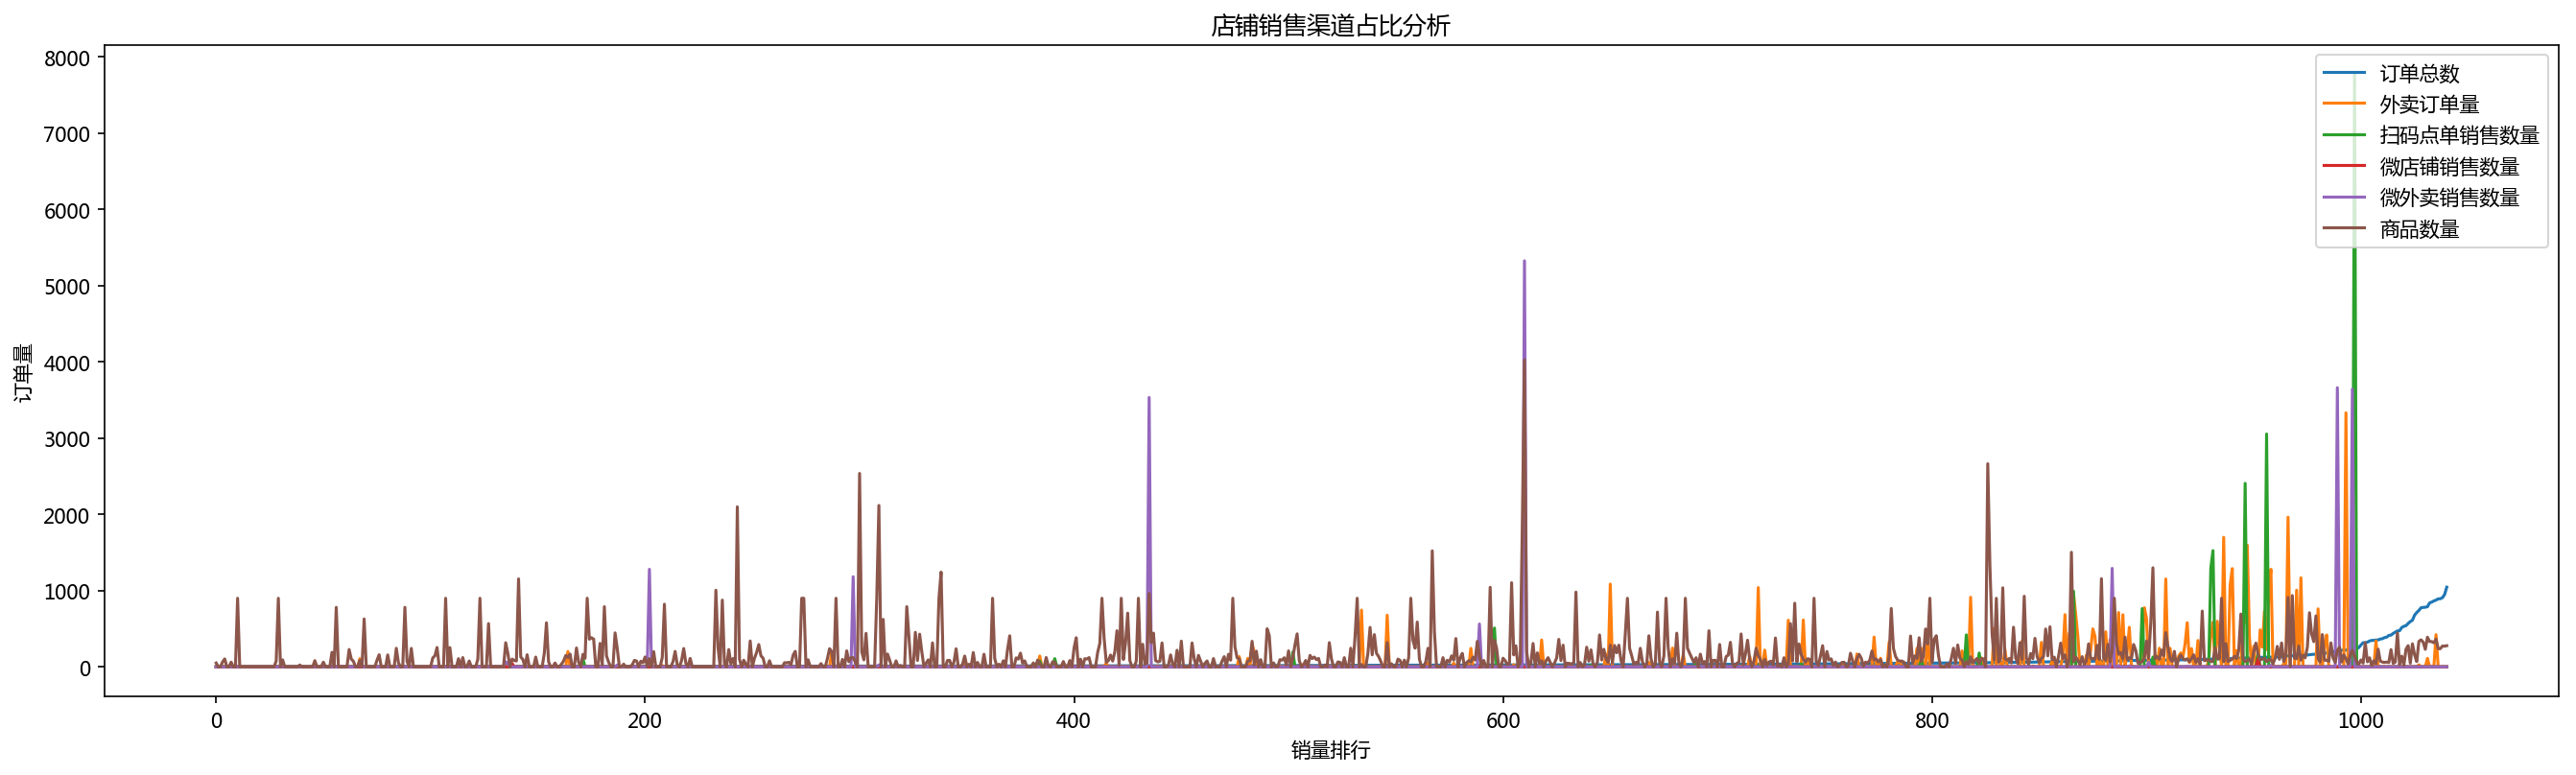

In [145]:


fig4 = plt.figure(figsize=(22,6),dpi=150)
a = (data['订单总数'])/40
b = data['外卖订单量']
c = data['扫码点单销售数量']
d = data['微店铺销售数量']
e = (data['微外卖销售数量'])/40
f = data['商品数量']
#g = data['整单优惠']

x = np.arange(0,len(data['订单总数']))


plt.plot(x,a,'',label='订单总数')

plt.plot(x,b,'',label='外卖订单量')
plt.plot(x,c,'',label='扫码点单销售数量')
plt.plot(x,d,'',label='微店铺销售数量')
plt.plot(x,e,'',label='微外卖销售数量')
plt.plot(x,f,'',label='商品数量')

plt.legend(loc='upper right')
#plt.plot(steps2, out.data.numpy().flatten(), 'b-')
ax = fig4.add_subplot(1,1,1)

ax.set_title('店铺销售渠道占比分析')
plt.xlabel('销量排行')
plt.ylabel('订单量')
plt.draw()
plt.ioff()
plt.show()   

In [157]:
a = len(data[data['有规格商品销售数量']>0])
b = len(data['有规格商品销售数量'])

print('有规格商品销售数量：',a)
print('有规格商品销售数量总数',b)
print('有规格商品销售占比',"%.2f%%" % (a/b*100))

有规格商品销售数量： 226
有规格商品销售数量总数 1041
有规格商品销售占比 21.71%


In [163]:
a = len(data[data['分类数量（非空）']>0])
b = len(data['分类数量（非空）'])
d = len(data[data['分类数量（非空）']>5])
e = len(data[data['分类数量（非空）']>10])
f = len(data[data['分类数量（非空）']>20])
print('分类数量（非空）：',a)
print('分类数量（非空）总数',b)
print('分类数量（非空）占比',"%.2f%%" % (a/b*100))
print('分类数量（非空）占比大于5',"%.2f%%" % (d/b*100))
print('分类数量（非空）占比大于10',"%.2f%%" % (e/b*100))
print('分类数量（非空）占比大于20',"%.2f%%" % (f/b*100))

分类数量（非空）： 511
分类数量（非空）总数 1041
分类数量（非空）占比 49.09%
分类数量（非空）占比大于5 37.56%
分类数量（非空）占比大于10 21.61%
分类数量（非空）占比大于20 5.09%
